In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np
import scipy.signal as signal
from cwt import cwtMortlet, cwtRicker, mortletWavelet, rickerWavelet
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:

# Create 1-D wave
sampleSize = 1000
cwtWidth = 256
signal = np.sin(np.arange(sampleSize) / 20.)


In [9]:

# Run CWT
sess = tf.Session()

In [10]:

cwtOp = cwtMortlet(signal, cwtWidth)
cwt = sess.run(cwtOp)

In [11]:
%time waveletOp = mortletWavelet(32, sampleSize) # Scale of 32. We are using from 1 to 256 (cwtWidth parameter). After scale of 160 it gets less accurate with sampleSize of 1000

CPU times: user 16 ms, sys: 4 ms, total: 20 ms
Wall time: 19.4 ms


In [12]:
%time wavelet = sess.run(waveletOp)

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 11.7 ms


In [13]:

sess.close()


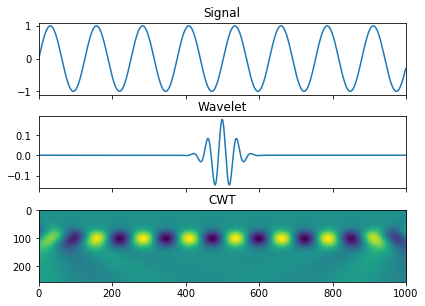

In [14]:

# Plot signal, wavelet, cwt
f, axarr = plt.subplots(3, sharex=True)
axarr[0].plot(signal)   
axarr[0].set_title('Signal')

axarr[1].plot(wavelet)   
axarr[1].set_title('Wavelet')

axarr[2].imshow(cwt, aspect='auto', interpolation='nearest') 
axarr[2].set_title('CWT')

f.subplots_adjust(hspace=0.3, left=.1, bottom=.05, top=.95, right=.95)
plt.show()